In [1]:
import numpy as np
import pandas as pd
from scipy import signal, optimize
import matplotlib.pyplot as plt

df_j = pd.read_csv('C:\\Users\\obinna.izima\\Documents\\Documents from Desktop_14.06.2020\\traces_March 8\\testcurves.csv')
xr = df_j['Jitter'][:1001].values



We can split the dataset into three sub-datasets using a simple criterion as first derivative estimate using first difference to assess it. The goal is to detect when curve drastically goes up or down (where dataset should be split. First derivative is estimated as follow):

In [2]:
def func(x,a,b):
    return a*np.exp(b*x)

In [3]:
N = len(xr)
t = np.linspace(0,10,N)

In [4]:
N

108

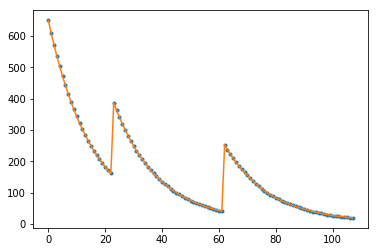

In [5]:
plt.plot(xr, '.')
plt.plot(xr, '-')

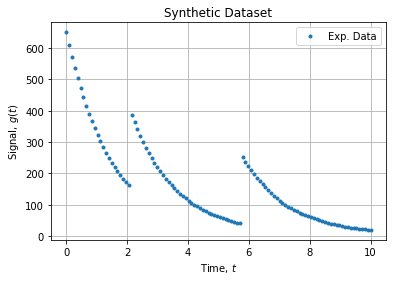

In [6]:
fig, axe = plt.subplots()
axe.plot(t, xr, '.', label='Exp. Data')
#axe.plot(t, x, '-', label='Exact')
axe.set_title("Synthetic Dataset")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Signal, $g(t)$")
axe.legend()
axe.grid()

In [7]:
dxrdt = np.abs(np.diff(xr)/np.diff(t))

In [8]:
xcrit = 450

In [9]:
q = np.where(dxrdt > xcrit)
q

(array([22, 61], dtype=int64),)

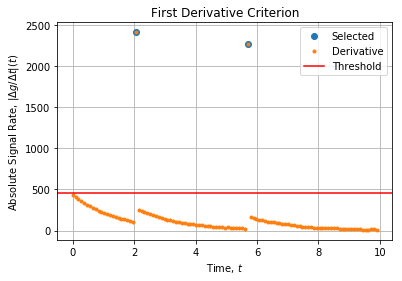

In [10]:
fig, axe = plt.subplots()
axe.plot(t[q[0]], dxrdt[q[0]], 'o', label='Selected')
axe.plot(t[:-1], dxrdt, '.', label='Derivative')
axe.axhline(xcrit, color="red", label='Threshold')
axe.set_title("First Derivative Criterion")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Absolute Signal Rate, $|\Delta g/\Delta t|(t)$")
axe.legend()
axe.grid()

In [11]:
idx = [0] + list(q[0]+1) + [t.size]
idx

[0, 23, 62, 108]

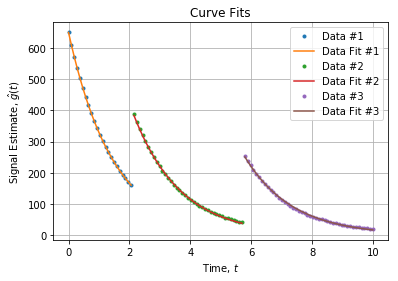

In [12]:
trials = []
fig, axe = plt.subplots()
for k, (i, j) in enumerate(zip(idx[:-1], idx[1:])):
    p, s = optimize.curve_fit(func, t[i:j]-t[i], xr[i:j])
    axe.plot(t[i:j], xr[i:j], '.', label="Data #{}".format(k+1))
    axe.plot(t[i:j], func(t[i:j]-t[i], *p), label="Data Fit #{}".format(k+1))
    trials.append({"n0": i, "n1": j, "t0": t[i], "a": p[0], "b": p[1],
                   "s_a": s[0,0], "s_b": s[1,1], "s_ab": s[0,1]})
axe.set_title("Curve Fits")
axe.set_xlabel("Time, $t$")
axe.set_ylabel("Signal Estimate, $\hat{g}(t)$")
axe.legend()
axe.grid()

In [13]:
df = pd.DataFrame(trials)

In [14]:
df

,a,b,n0,n1,s_a,s_ab,s_b,t0
0,649.378018,-0.680643,0,23,0.065015,-0.000097,2.640016e-07,0.000000
1,383.561038,-0.649979,23,62,0.669652,-0.001270,4.788677e-06,2.149533
2,250.794381,-0.640060,62,108,0.531930,-0.001452,8.063216e-06,5.794393


In [15]:
data = pd.read_csv('C:\\Users\\obinna.izima\\Documents\\Documents from Desktop_14.06.2020\\traces_March 8\\h.264+mp3_TS.csv')

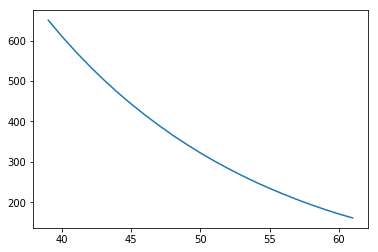

In [25]:
plt.plot(data['Jitter'][39:62])

In [26]:
df_test = data['Jitter'][39:62]

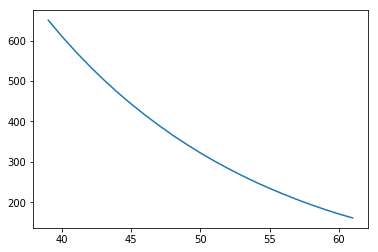

In [27]:
plt.plot(df_test)

In [28]:
len(df)

3

In [29]:
df

,a,b,n0,n1,s_a,s_ab,s_b,t0
0,649.378018,-0.680643,0,23,0.065015,-0.000097,2.640016e-07,0.000000
1,383.561038,-0.649979,23,62,0.669652,-0.001270,4.788677e-06,2.149533
2,250.794381,-0.640060,62,108,0.531930,-0.001452,8.063216e-06,5.794393


In [39]:
tx = df_test.values

In [34]:
type(trials)

list

In [35]:
len(trials)

3

In [38]:
trials[0]['a']

649.3780179444684

In [43]:
def fit(xt,at,bt):
    return at*np.exp(bt*xt)

In [50]:
pred = fit(tx,tx[0],trials[0]['b'])

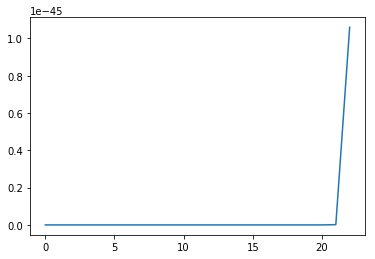

In [53]:
#plt.plot(df_test,'ro')
plt.plot(pred)

In [52]:
pred

array([4.07933611e-190, 3.95530063e-178, 5.55969782e-167, 1.72056131e-156,
       1.07510342e-146, 1.78059270e-137, 7.21547322e-129, 8.42145236e-121,
       3.09678328e-113, 4.44819767e-106, 1.96878456e-099, 3.89961750e-093,
       2.90647910e-087, 8.56469386e-082, 1.25040076e-076, 8.82644599e-072,
       2.79861753e-067, 4.63607820e-063, 4.64575902e-059, 2.57291622e-055,
       7.62870793e-052, 1.42779108e-048, 1.05983189e-045])

In [46]:
tx

array([650.2120319, 609.6619535, 571.9492203, 536.4599426, 503.3212726,
       472.1334361, 443.0139852, 415.7232848, 390.1294684, 365.9167447,
       343.433587 , 322.1317239, 302.2658523, 283.7633129, 266.2925989,
       249.8895476, 234.6623398, 220.3889574, 206.8540781, 194.1904344,
       182.4447336, 171.3749864, 161.6639733])

In [48]:
trials[0]['a']

649.3780179444684

In [49]:
trials[0]['b']

-0.6806434058601746

In [69]:
x_future = np.linspace(0,10,23)

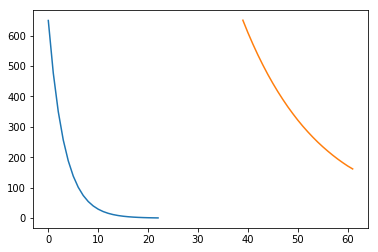

In [72]:
plt.plot(func(x_future,trials[0]['a'],trials[0]['b']))
plt.plot(df_test)

In [73]:
fitted = np.array([466.87439074, 437.96603127, 411.1953727 , 385.97146696,
       362.44996697, 340.29690102, 319.54071057, 300.34124172,
       282.17254521, 264.82705592, 248.64814388, 233.46138319,
       219.21502998, 205.93930145, 193.42791913, 181.86236679,
       170.84758495, 160.70343939, 151.09368511, 142.18249232,
       133.83008798, 125.89441774, 118.79401397])

In [74]:
def exp(tf,amp,decay):
     return amp*np.exp(decay*tf)

In [75]:
pop,popt = optimize.curve_fit(exp,x_future,fitted)

In [76]:
pop

array([ 4.65939736e+02, -1.37817762e-01])

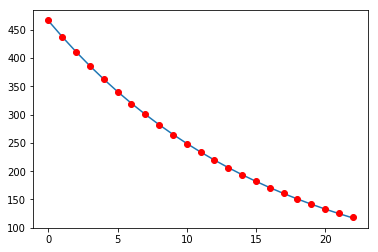

In [81]:
plt.plot(exp(x_future,*pop))
plt.plot(fitted,'ro')

In [82]:
fitted

array([466.87439074, 437.96603127, 411.1953727 , 385.97146696,
       362.44996697, 340.29690102, 319.54071057, 300.34124172,
       282.17254521, 264.82705592, 248.64814388, 233.46138319,
       219.21502998, 205.93930145, 193.42791913, 181.86236679,
       170.84758495, 160.70343939, 151.09368511, 142.18249232,
       133.83008798, 125.89441774, 118.79401397])

In [84]:
predictions = exp(x_future,*pop)

In [85]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(fitted, predictions))
print('MSE:', metrics.mean_squared_error(fitted, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(fitted, predictions)))

MAE: 0.4076525365935206
MSE: 0.25767975560730816
RMSE: 0.5076216658174749


In [87]:
from sklearn.metrics import r2_score
print ("Accuracy :",r2_score(fitted,predictions))

Accuracy : 0.999976152762895
